# Drug discovery by modeling bioactivity data

by : omar marey


In this project I will select one of the COVID surface proteins and scrape ChEMBL database for drugs of know activity on that protein. Then I will use them to train a machine learning model to predict the bio-activity of molecules stored in drugs databases to find candidates for further research. In hope of finding a potential treatment. 

## Importing and installing libraries
Install chembl client and import required libraries for analysis like pandas, numpy, matplotlib, seaborn

In [ ]:
 
! pip install chembl_webresource_client


     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 596 kB 17.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client

 ### Scraping data 
I wil use the chambl web client to list all the proteins available at the database about coronavirus and  select a protein

In [ ]:
target_mol = 'coronavirus'
target = new_client.target
target_data = target.search(target_mol)
target_df = pd.DataFrame.from_dict(target_data)
target_df


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


I chose the sixth element in the table which is replicase polyprotein 1ab  (SARS coronavirus) , so i will extract the protein id then search and extract in the data base for the compounds that works on this protein.  

In [ ]:
target_protein_id = target_df.target_chembl_id[6]
print(target_protein_id)
activity = new_client.activity
activity_data = activity.filter(target_chembl_id=target_protein_id)


CHEMBL5118


## Cleaning the data 
Now I will explore the data and clean it by:
- extracting the rows that has standard type IC50
- changing columns type to the appropriate type
- some molecules have multiple rows with different values so I aggregated them and calculated their mean
- categorized the standard values into inactive, intermediate, and active



In [ ]:
activity_df = pd.DataFrame(activity_data)
activity_df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,None,18548176,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.3
374,None,18548177,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,5.5
375,None,18548178,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.1
376,None,18548179,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,3.2


In [ ]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   activity_comment           60 non-null     object
 1   activity_id                378 non-null    int64 
 2   activity_properties        378 non-null    object
 3   assay_chembl_id            378 non-null    object
 4   assay_description          378 non-null    object
 5   assay_type                 378 non-null    object
 6   assay_variant_accession    0 non-null      object
 7   assay_variant_mutation     0 non-null      object
 8   bao_endpoint               378 non-null    object
 9   bao_format                 378 non-null    object
 10  bao_label                  378 non-null    object
 11  canonical_smiles           378 non-null    object
 12  data_validity_comment      40 non-null     object
 13  data_validity_description  40 non-null     object
 14  document_c

here i could choose any standard type but i should use one type as every one is calculated in different way so i will extract the IC50 rows to get the highest number of rows 

IC50 : inhibitory concentration 50, the less the more potent inhibitory effect of the molecule, as less concentration requeired to inhibit 50% of the activity of the protien

In [ ]:
activity_df.standard_type.value_counts()

IC50          215
Inhibition    103
Ki             43
Activity       11
Ratio IC50      3
Kd              3
Name: standard_type, dtype: int64

In [ ]:
activity_df= activity_df[activity_df.standard_type == 'IC50']

converting the standard_value columns from object to numeric so i can preform calculation on it 

In [ ]:
activity_df['standard_value'] = pd.to_numeric(activity_df.standard_value) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


some molecules exist in the table many times, so i will group them and take the mean of the standard value of the repeated molecules and also the min and max so i can know the range 

In [ ]:
grouped_act = activity_df.groupby('molecule_chembl_id').agg({'standard_value': ['mean','min','max'],'canonical_smiles':'first'
})

it seems that there difference between the standard values of repeated molecules

In [ ]:
sorted(grouped_act.standard_value['max']- grouped_act.standard_value['min'],reverse=True)

[199060.0,
 170200.0,
 170100.0,
 160400.0,
 157900.0,
 154600.0,
 125500.0,
 123300.0,
 98900.0,
 69900.0,
 65400.0,
 51700.0,
 45800.0,
 44800.0,
 44600.0,
 41900.0,
 40700.0,
 39000.0,
 34800.0,
 34600.0,
 22700.0,
 21300.0,
 18200.0,
 16800.0,
 13700.0,
 12700.0,
 12100.0,
 11800.0,
 10800.0,
 9040.0,
 7300.0,
 1500.0,
 1400.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


now i will catagorize th standard values 
* from 0 to 1000 -> active
* from 1000 to 10000 -> intermediate
* more than 10000 -> inactive

In [ ]:
grouped_act['activity_class'] = pd.cut(grouped_act.standard_value['mean'],bins=[0,1000,10000,np.inf],labels=['active','intermediate','inactive'])
grouped_act.columns= ['st_value_mean','st_value_min','st_value_max','smiles','class']
grouped_act

,st_value_mean,st_value_min,st_value_max,smiles,class
molecule_chembl_id,,,,,
CHEMBL1092796,2600.0,2600.0,2600.0,CC1=CC[C@]2(C)CC[C@]3(C)C4=CC=C5C(=CC(=O)C(O)=...,intermediate
CHEMBL1092797,21700.0,21700.0,21700.0,Cc1c(O)c(O)cc2c1CC=C1[C@@]3(C)CC[C@@]4(C)CC[C@...,inactive
CHEMBL116438,23500.0,23500.0,23500.0,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive
CHEMBL1276871,12000.0,12000.0,12000.0,COc1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(C(=O)O)cc3)...,inactive
CHEMBL1277046,5500.0,5500.0,5500.0,N#Cc1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(C(=O)O)cc3...,intermediate
...,...,...,...,...,...
CHEMBL560933,32700.0,15400.0,50000.0,O=c1c(O)c(-c2ccc3c(c2)OCO3)oc2cc(OCc3cccc(Cl)c...,inactive
CHEMBL61320,4450.0,4450.0,4450.0,O=C1Nc2ccc(S(=O)(=O)N3CCCCC3)cc2C1=O,intermediate
CHEMBL63354,8300.0,8300.0,8300.0,O=c1cc(-c2ccc(O)c(-c3c(O)cc(O)c4c(=O)cc(-c5ccc...,intermediate


by ploting the count of every class it's obivous that the classes imblanced that will affect the performace of the model and will also decide the metric i will use to evaluate the model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


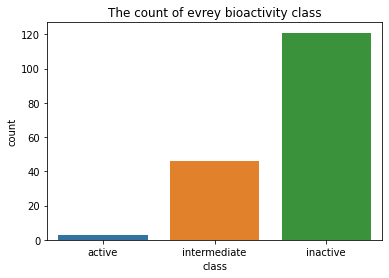

In [ ]:
sns.countplot(grouped_act['class'])
plt.title('The count of evrey bioactivity class');

## Feature engineering

Here I create new feature form the data I have by:
- Make a mole columns that has the molecular representation of the molecules
- Calculate lipinski descriptors from the smiles (representation of the molecular structure)
- made a new data frame that has the name and structure of the molecules and the calculated descriptors as well as the activity class
- Added the log of the mean standard values because those values were skewed

In [ ]:
! pip install rdkit-pypi

     |████████████████████████████████| 22.3 MB 1.3 MB/s 


In [ ]:

from rdkit.Chem import Lipinski,Descriptors,MolFromSmiles

grouped_act['Mol'] = grouped_act.smiles.apply(MolFromSmiles)
mol_df =  pd.concat([grouped_act,grouped_act.Mol.apply(Descriptors.MolWt),grouped_act.Mol.apply(Descriptors.MolLogP),
    grouped_act.Mol.apply(Descriptors.NumHAcceptors),grouped_act.Mol.apply(Descriptors.NumHDonors)],axis=1)
col_names = list(grouped_act.columns.values) + ['molwl','logp','num_h_acc','num_h_donor']
mol_df.columns = col_names
mol_df

,st_value_mean,st_value_min,st_value_max,smiles,class,Mol,molwl,logp,num_h_acc,num_h_donor
molecule_chembl_id,,,,,,,,,,
CHEMBL1092796,2600.0,2600.0,2600.0,CC1=CC[C@]2(C)CC[C@]3(C)C4=CC=C5C(=CC(=O)C(O)=...,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77c60>,404.594,7.16300,2,1
CHEMBL1092797,21700.0,21700.0,21700.0,Cc1c(O)c(O)cc2c1CC=C1[C@@]3(C)CC[C@@]4(C)CC[C@...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77df0>,452.635,6.64392,3,3
CHEMBL116438,23500.0,23500.0,23500.0,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77da0>,368.385,3.85260,6,3
CHEMBL1276871,12000.0,12000.0,12000.0,COc1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(C(=O)O)cc3)...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77d50>,398.418,4.22790,4,1
CHEMBL1277046,5500.0,5500.0,5500.0,N#Cc1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(C(=O)O)cc3...,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77e40>,393.402,4.09098,4,1
...,...,...,...,...,...,...,...,...,...,...
CHEMBL560933,32700.0,15400.0,50000.0,O=c1c(O)c(-c2ccc3c(c2)OCO3)oc2cc(OCc3cccc(Cl)c...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f210>,438.819,4.83230,7,2
CHEMBL61320,4450.0,4450.0,4450.0,O=C1Nc2ccc(S(=O)(=O)N3CCCCC3)cc2C1=O,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f260>,294.332,0.99600,4,1
CHEMBL63354,8300.0,8300.0,8300.0,O=c1cc(-c2ccc(O)c(-c3c(O)cc(O)c4c(=O)cc(-c5ccc...,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f2b0>,538.464,5.13400,10,6


Ploting pairplot to get a glance of the data

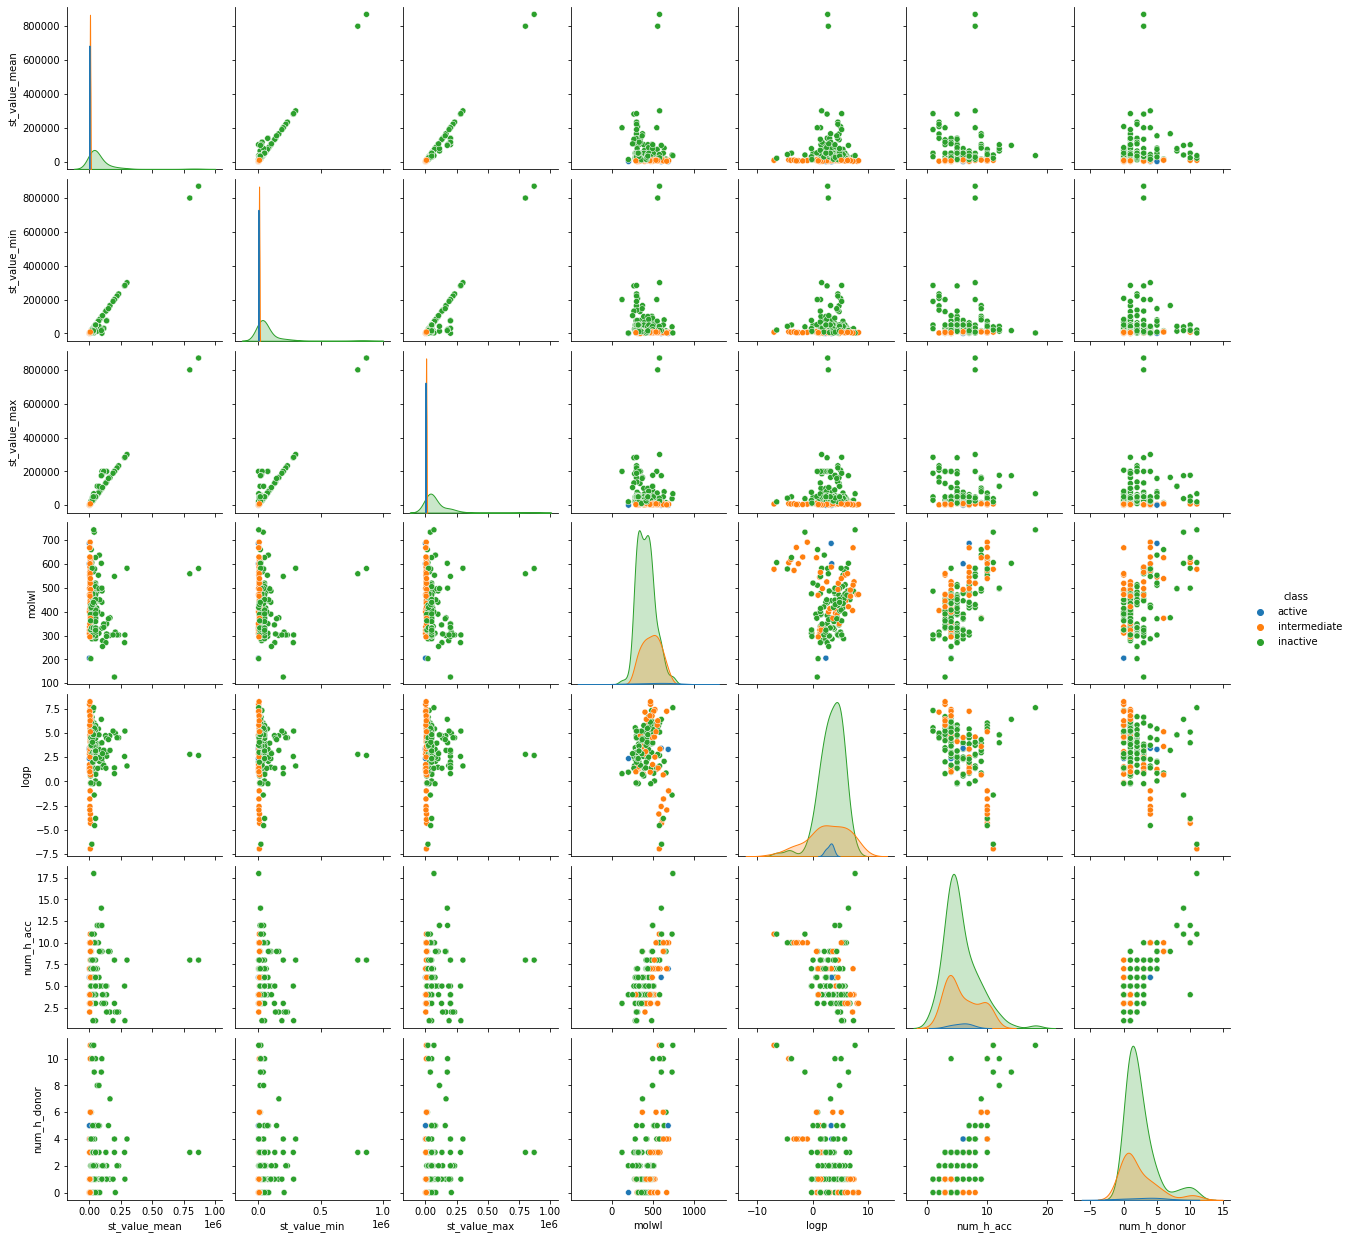

In [ ]:
sns.pairplot(mol_df,hue='class')

The IC50 values are clearly skewed. So I will calculate the log of the molar concentration to correct this skewness
( nano mole * 10^-9 = mole )

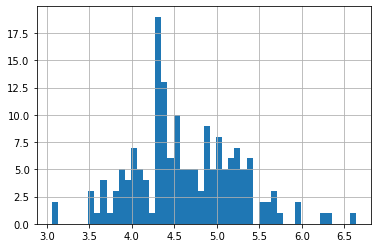

In [ ]:
mol_df['PIC50'] = (-(mol_df.st_value_mean*10**-9).apply(np.log10))
mol_df.PIC50.hist(bins=50,)

## Statistical analysis
**Is the active drugs population differ from the inactive in regard to the descriptors in the dataframe?**


---



**After analysis conclusion**:  Using mann whitney u test, it appears that the population does't differ in the featured except for the PIC50 and that clearly because the bio-activity classes were made using cut off values from the IC50 values.

**So I will need to calculate more descriptors**




In [ ]:
from scipy.stats import mannwhitneyu

def manw_analysis(feature,data_frame):
  active_df = data_frame[data_frame['class'] == 'active']
  inactive_df = data_frame[data_frame['class']=='inactive']

  stat,p = mannwhitneyu(active_df[feature],inactive_df[feature])

  print('stat :',stat,'\n p_value :',p)
  sns.violinplot(data_frame['class'],data_frame[feature])
  return 

  


stat : 0.0 
 p_value : 0.0016090227084133801


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


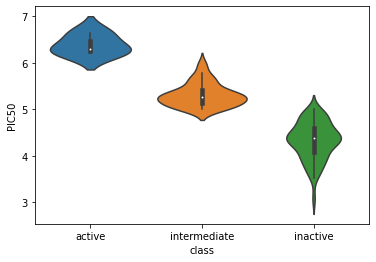

In [ ]:
manw_analysis('PIC50',mol_df)

stat : 157.0 
 p_value : 0.3463946115115505


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


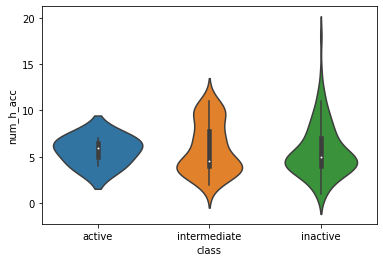

In [ ]:
manw_analysis('num_h_acc',mol_df)

stat : 149.5 
 p_value : 0.29984947571311743


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


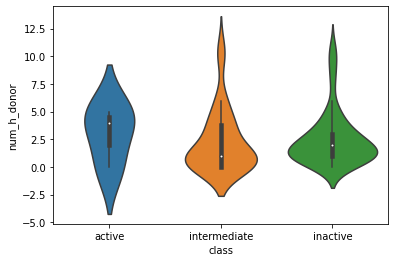

In [ ]:
manw_analysis('num_h_donor',mol_df)

stat : 148.0 
 p_value : 0.29574814269700533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


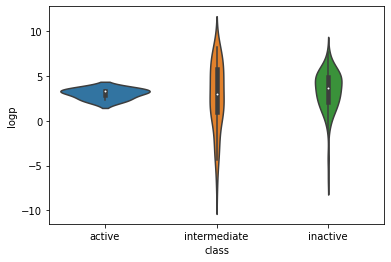

In [ ]:
manw_analysis('logp',mol_df)

stat : 128.0 
 p_value : 0.19436534356088436


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


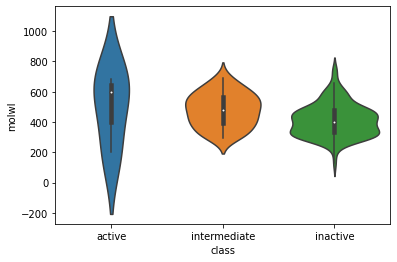

In [ ]:
manw_analysis('molwl',mol_df)

## Calculating More descriptors

I will use padelpy library to calculate some more descriptors from the smile of every molecule
 

In [ ]:
# install padelpy
! pip install padelpy

     |████████████████████████████████| 20.9 MB 4.5 MB/s 


here i download configuration files that contains the already made equation that help me in calculating more descriptors

In [ ]:

! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2022-03-10 05:15:17--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-03-10 05:15:17--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-03-10 05:15:17 (70.3 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprint

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

fp = dict(zip(FP_list, xml_files))

In [ ]:
from padelpy import padeldescriptor

df2 = mol_df.reset_index()[['smiles','molecule_chembl_id']]
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)

fingerprint = 'PubChem'
fingerprint_output_file = ''.join([fingerprint,'.csv']) 
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file,  
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)
descreptors_df = pd.read_csv('PubChem.csv')
descreptors_df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1092796,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL116438,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1092797,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1276871,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1277046,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,CHEMBL61320,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,CHEMBL560933,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,CHEMBL71893,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,CHEMBL8145,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mol_des = pd.merge(descreptors_df,mol_df,left_on='Name',right_index=True)
mol_des

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,st_value_min,st_value_max,smiles,class,Mol,molwl,logp,num_h_acc,num_h_donor,PIC50
0,CHEMBL1092796,1,1,1,1,0,0,0,0,0,...,2600.0,2600.0,CC1=CC[C@]2(C)CC[C@]3(C)C4=CC=C5C(=CC(=O)C(O)=...,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77c60>,404.594,7.16300,2,1,5.585027
1,CHEMBL116438,1,1,1,0,0,0,0,0,0,...,23500.0,23500.0,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77da0>,368.385,3.85260,6,3,4.628932
2,CHEMBL1092797,1,1,1,1,0,0,0,0,0,...,21700.0,21700.0,Cc1c(O)c(O)cc2c1CC=C1[C@@]3(C)CC[C@@]4(C)CC[C@...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77df0>,452.635,6.64392,3,3,4.663540
3,CHEMBL1276871,1,1,1,0,0,0,0,0,0,...,12000.0,12000.0,COc1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(C(=O)O)cc3)...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77d50>,398.418,4.22790,4,1,4.920819
4,CHEMBL1277046,1,1,0,0,0,0,0,0,0,...,5500.0,5500.0,N#Cc1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(C(=O)O)cc3...,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be77e40>,393.402,4.09098,4,1,5.259637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,CHEMBL61320,1,1,0,0,0,0,0,0,0,...,4450.0,4450.0,O=C1Nc2ccc(S(=O)(=O)N3CCCCC3)cc2C1=O,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f260>,294.332,0.99600,4,1,5.351640
166,CHEMBL560933,1,1,0,0,0,0,0,0,0,...,15400.0,50000.0,O=c1c(O)c(-c2ccc3c(c2)OCO3)oc2cc(OCc3cccc(Cl)c...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f210>,438.819,4.83230,7,2,4.485452
167,CHEMBL71893,1,1,1,0,0,0,0,0,0,...,189100.0,189100.0,CC(C)C1=CC2=CC[C@H]3[C@](C)(C(=O)O)CCC[C@]3(C)...,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f300>,302.458,5.20620,1,1,3.723308
168,CHEMBL8145,1,1,0,0,0,0,0,0,0,...,105000.0,105000.0,O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12,inactive,<rdkit.Chem.rdchem.Mol object at 0x7fcc6be7f350>,254.241,2.87120,4,2,3.978811


## Machine learning model creation

### preprocessing:

* Extracted the class column to be the target (y) and the rest of the column will be the predictors (x)
* Removed unwanted columns 
* Converted the columns to numeric data so it could be modeled 
* Removed PIC50 column as the target Y is calculated from it and that would lead to data leakage
* Removed columns with low variance in x as probably they won't be of any help
* Splitted the data to train and test sets and stratified them using y to insure that every split contains the same percentages of the different classes
* Normalized the data using standard scaler



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]


stdscaler = StandardScaler()

y = mol_des['class']
x = mol_des.drop(columns=['Name','st_value_min','st_value_max','smiles','Mol','class','st_value_mean','PIC50'])
x =  x.apply(pd.to_numeric)
x = remove_low_variance(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)

x_train = stdscaler.fit_transform(x_train)
x_test = stdscaler.transform(x_test)

print(x_train.shape,x.shape)

(127, 255) (170, 255)


### Training and testing

I will created many ML algorithms and fine tune every model using grid search technique to find the best hyperparameter then compare their performance

### Logistic Regression


In [ ]:
log_reg = LogisticRegression()
params_log = {'C':[0.00001,0.0001,0.001,.001,0.01,0.1,1,10]}
log_grid = GridSearchCV(log_reg, param_grid=params_log,cv=4,n_jobs=-1)
log_grid.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  UserWarning,


              precision    recall  f1-score   support

      active       1.00      1.00      1.00         1
    inactive       0.70      0.84      0.76        25
intermediate       0.67      0.47      0.55        17

    accuracy                           0.70        43
   macro avg       0.79      0.77      0.77        43
weighted avg       0.69      0.70      0.69        43



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(log_grid.best_params_)
print(classification_report(log_grid.best_estimator_.predict(x_test),y_test))

{'C': 1}
              precision    recall  f1-score   support

      active       1.00      1.00      1.00         1
    inactive       0.70      0.84      0.76        25
intermediate       0.67      0.47      0.55        17

    accuracy                           0.70        43
   macro avg       0.79      0.77      0.77        43
weighted avg       0.69      0.70      0.69        43



### Random Forest Classifier

In [ ]:
from seaborn.axisgrid import Grid
forest = RandomForestClassifier()
params_forest = {
    'n_estimators':[20,30,50,100,150],
    'max_features':['auto','sqrt'],
    'max_depth':[50,60,70,None],
    
}
forest_grid= GridSearchCV(forest,param_grid=params_forest,cv=4,n_jobs=-1,verbose=True)
forest_grid.fit(x_train,y_train)
best_forest = forest_grid.best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  UserWarning,


              precision    recall  f1-score   support

      active       0.00      0.00      0.00         0
    inactive       0.93      0.80      0.86        35
intermediate       0.42      0.62      0.50         8

    accuracy                           0.77        43
   macro avg       0.45      0.48      0.45        43
weighted avg       0.84      0.77      0.79        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(forest_grid.best_params_)
print(classification_report(best_forest.predict(x_test),y_test)) 

{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

      active       0.00      0.00      0.00         0
    inactive       0.93      0.80      0.86        35
intermediate       0.42      0.62      0.50         8

    accuracy                           0.77        43
   macro avg       0.45      0.48      0.45        43
weighted avg       0.84      0.77      0.79        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Those models could be used to scan drugs databases and library to find a drug that would be categorized as active drug against the chosen protein. those drugs would be interesting candidate for investigation for finding new use for already made drugs in covid as that would be much faster and easier than creating and testing new molecules. this method could be used for different proteins of covid virus by simply changing the chosen protein in scraping data section

## Limitations
I could't create more complex models because I do't have the resources to do so. This is just testing of the idea but those models are not ready for production as It needs more data to train on and more resources so I could try more algorithms and finer tuning of the hyperparameter